In [1]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from helpers.funcs import resample
import matplotlib.pyplot as plt
%matplotlib inline

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  retu

In [2]:
def setindexdatetime(df, index_col):
    df[index_col] = pd.to_datetime(df[index_col])
    df.set_index(index_col, inplace=True)
    df = df.astype(np.float)
    return df

In [3]:
tr = setindexdatetime(pd.read_csv('valids/v_ready_iqr_tr.csv'),'Timestamp')
ts = setindexdatetime(pd.read_csv('valids/v_ready_iqr_ts.csv'),'Timestamp')

In [4]:
tr.index.freq = '15T'

In [5]:
ts = resample(ts)

/home/berkkarahan/Desktop/tupras/helpers/funcs.py:38: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  tseries.index[0], pd.tslib.Timestamp), 'Object must have a datetime-like index.'
/home/berkkarahan/Desktop/tupras/helpers/funcs.py:72: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  tseries = tseries.resample(short_rate, how='mean').interpolate()
/home/berkkarahan/Desktop/tupras/helpers/funcs.py:75: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ffill()
  tseries = tseries.resample(rate, how='ffill')


In [6]:
from helpers.funcs import timeseries_train_test_split as TSSplit, single_ts_split

In [7]:
f = ((24*60)//15)
sd = seasonal_decompose(tr.Target, freq=f)

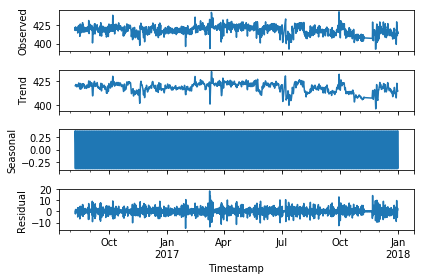

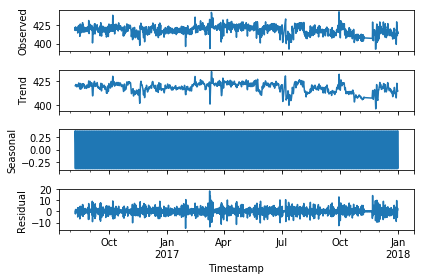

In [17]:
sd.plot()

In [8]:
seasonality = sd.seasonal
rest = tr.Target - seasonality

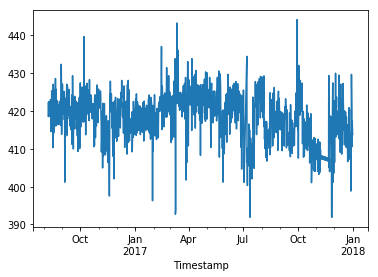

In [9]:
rest.plot()

In [22]:
rest_tr, rest_ts = single_ts_split(tr.Target, test_size=0.3)

In [11]:
from pmdarima import auto_arima
import pmdarima as pm

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [27]:
swfit = auto_arima(rest_tr,
                   start_p=1,
                   start_q=1,
                   start_P=1,
                   start_Q=1,
                   max_p=12,
                   max_q=12,
                   max_P=12,
                   max_Q=12,
                   seasonal=True,
                   D=5,
                   max_D=24,
                   n_jobs=-1,
                   error_action='ignore',
                   supress_warnings=True)

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/pmdarima/arima/auto.py:379: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-pac

In [28]:
swfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                34272
Model:               SARIMAX(3, 1, 5)   Log Likelihood               37195.399
Date:                Thu, 13 Dec 2018   AIC                         -74370.799
Time:                        23:27:53   BIC                         -74286.378
Sample:                             0   HQIC                        -74343.882
                              - 34272                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.581e-06   1.38e-05     -0.333      0.739   -3.16e-05    2.24e-05
ar.L1          1.3243      0.501      2.645      0.008       0.343       2.306
ar.L2          0.2711      0.977      0.278      0.781      -1.644       2.186
ar.L3         -0.5997      0.478     -1.255      0.209      -1.536       0.337
ma.L1         -0.3499      0.501     -0.698      0.485      -1.332       0.632
ma.L2         -0.6148      0.489     -1.256      0.209      -1.574       0.344
ma.L3         -0.3351      0.003   -100.242      0.000      -0.342      -0.329
ma.L4          0.1157      0.162      0.715      0.474      -0.201       0.433
ma.L5          0.2107      0.159      1.326      0.185      -0.101       0.522
sigma2         0.0066   1.79e-06   3714.293      0.000       0.007       0.007
===================================================================================
Ljung-Box (Q):                     3148.98   Jarque-Bera (JB):        7611541099.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                      2311.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
y_pred = swfit.predict(n_periods=rest_ts.shape[0])

In [30]:
pred_ser = pd.Series(data=y_pred, index=rest_ts.index)

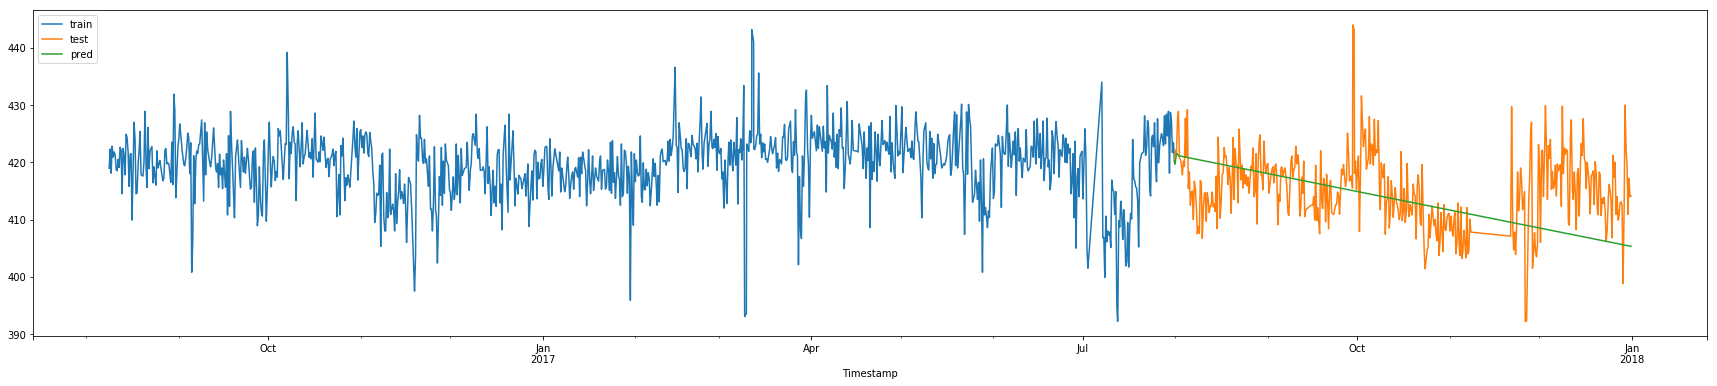

In [31]:
fig, ax = plt.subplots(figsize=(30,6))
rest_tr.plot(label='train')
rest_ts.plot(label='test')
pred_ser.plot(label='pred')
plt.legend(loc='upper left')